In [70]:
import requests
from PIL import Image, ImageSequence
import numpy as np
import matplotlib.pyplot as plt
import io

import torch
import torch.nn as nn
import torch.optim as optim

In [71]:
# 拉取验证码图片
url = "https://pass.hust.edu.cn/cas/code"
UA = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36"

headers = {
    "User-Agent":UA,
}

response = requests.get(url, headers=headers)
# with open("code.gif", "wb") as f:
#     f.write(response.content)

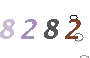

In [72]:
img = Image.open(io.BytesIO(response.content))
img.seek(1) # 帧指针指向第二帧
img

预处理+分割

In [73]:
# arr1 = np.zeros((58, 90))
# for frame in ImageSequence.Iterator(img):
#     arr2 = np.array(frame.convert('L'))
#     # print(arr2.shape)
#     arr1 += arr2
# arr1 = arr1//4

# arr1 = (arr1 < 210)*255  # 阈值化
# merged_image = Image.fromarray(arr1)  # 从numpy数组转换回图片
# merged_image = merged_image.convert('L')  # 转为灰度图
# d = [np.array(merged_image.crop((0, 16, 16, 40))), 
#       np.array(merged_image.crop((22, 16, 38, 40))), 
#       np.array(merged_image.crop((44, 16, 60, 40))), 
#       np.array(merged_image.crop((66, 16, 82, 40)))]

# data = [np.array(tuple(i)).reshape(24, 16).astype(np.float32) for i in d]
# data = torch.tensor(data).reshape(-1, 1, 24, 16)

# data.shape


torch.Size([4, 1, 24, 16])

### 加载模型

In [74]:
# # 定义CNN模型， 直接使用pytorch的API
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         # 卷积层1，填充1， 宽度增加2，卷积核大小3x3，输出长宽仍为16*24
#         self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1,padding=1) 
#         self.relu = nn.ReLU()  # 激活函数
#         # 池化层1， 长宽均缩减一半， 输出长宽为8*12
#         self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)  
#         # # 卷积层2，卷积核大小是3x3，输出长宽为6*10
#         self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1) 
#         # 2次卷积+池化后，当前图片的大小是3x5， 64个通道。
#         self.fc1 = nn.Linear(32*3*5, 128)  # 全连接层1, 输出128个特征
#         self.fc2 = nn.Linear(128, 10)  # 全连接层2, 输出10个分类

#     def forward(self, x):
#         # 卷积层1，填充1， 宽度增加2，卷积核大小3x3，输出长宽仍为16*24
#         x = self.conv1(x)
#         x = self.relu(x)
#         # 池化层1， 长宽均缩减一半， 输出长宽为8*12
#         x = self.maxpool(x)
#         # 卷积层2，卷积核大小是3x3，输出长宽为6*10
#         x = self.conv2(x)
#         x = self.relu(x)
#         # 池化层2， 长宽均缩减一半， 输出长宽为3*5
#         x = self.maxpool(x)
#         x = x.view(x.size(0), -1)
#         # 全连接层1, 输出128个特征
#         x = self.fc1(x)
#         x = self.relu(x)
#         # 全连接层2, 输出10个分类
#         x = self.fc2(x)
#         return x
    
# net = CNN()
# net.load_state_dict(torch.load('cnn_model.pth'))
# net.eval()  # 评估模式

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=480, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

结果


tensor([8, 2, 8, 2])


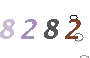

In [75]:
# ret = net(data)
# print(ret.argmax(dim=1))  # 识别出来的数字
# img.seek(1)
# img